In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
delhi_housing = pd.read_csv('/content/datasets_452607_854899_MagicBricks.csv')


In [ ]:
delhi_housing['pps']=delhi_housing["Price"]/delhi_housing["Area"]

In [ ]:
delhi_housing

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,pps
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN,8125.000000
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,6666.666667
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,16315.789474
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,7000.000000
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,9538.461538
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0,13355.998057
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0,11904.761905
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0,20000.000000
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0,11616.161616


In [ ]:
delhi_housing=delhi_housing[~(delhi_housing.Area/delhi_housing.BHK<300)]

In [ ]:
def remove(df):
   df_out = pd.DataFrame()
   for a,b in df.groupby('Locality'):
       m=np.mean(b.pps)
       st=np.std(b.pps)
       df_red=b[(b.pps>(m-st)) &(b.pps<(m+st))]
       df_out = pd.concat([df_out,df_red],ignore_index=True)
   return df_out
delhi_housing=remove(delhi_housing) 

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Locality'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.pps),
                'std': np.std(bhk_df.pps),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>2:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.pps<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
delhi_housing=remove_bhk_outliers(delhi_housing)

In [ ]:
delhi_housing['Area']=delhi_housing.Area/1000


In [ ]:
delhi_housing.Locality=delhi_housing.Locality.apply(lambda x:x.strip())
location=delhi_housing.groupby("Locality")['Locality'].agg('count').sort_values(ascending=False)
location=location[location<=1]
delhi_housing.Locality=delhi_housing.Locality.apply(lambda x:"other"if x in location else x)

In [ ]:
g=delhi_housing.Locality.unique()

In [ ]:
for i in g:
  print(i) 

In [ ]:
delhi_housing

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,pps
0,1.470,3,2.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,14500000,Ready_to_move,Resale,Apartment,NaN,9863.945578
1,1.500,3,2.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,14900000,Ready_to_move,Resale,Apartment,NaN,9933.333333
2,1.700,3,3.0,Semi-Furnished,"Aashirwaad Chowk, Dwarka",1.0,17200000,Ready_to_move,Resale,Apartment,NaN,10117.647059
3,0.750,2,2.0,Semi-Furnished,other,1.0,3800000,Ready_to_move,Resale,Builder_Floor,10320.0,5066.666667
4,1.500,3,3.0,Unfurnished,Alaknanda,1.0,26500000,Ready_to_move,New_Property,Apartment,NaN,17666.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.360,1,1.0,Unfurnished,"Yamuna Vihar, Shahdara",1.0,2500000,Ready_to_move,Resale,Builder_Floor,6944.0,6944.444444
519,2.430,4,3.0,Furnished,"Yamuna Vihar, Shahdara",1.0,25000000,Ready_to_move,Resale,Builder_Floor,10288.0,10288.065844
520,2.970,7,4.0,Furnished,"Yamuna Vihar, Shahdara",1.0,26500000,Ready_to_move,Resale,Builder_Floor,8923.0,8922.558923
522,1.500,5,3.0,Furnished,"Yamuna Vihar, Shahdara",1.0,30000000,Ready_to_move,Resale,Builder_Floor,20000.0,20000.000000


In [ ]:
delhi_housing.max()

Area                   14.22
BHK                        7
Bathroom                   7
Furnishing       Unfurnished
Locality               other
Parking                  114
Price              170000000
Status         Ready_to_move
Transaction           Resale
Type           Builder_Floor
Per_Sqft              183333
pps                    37037
dtype: object

In [ ]:
delhi_housing.drop(['Per_Sqft','pps'],axis=1,inplace=True)

In [ ]:
def average(parking):
    if pd.isnull(parking):
        return 2
    else:
        return parking

In [ ]:
delhi_housing['Parking'] = delhi_housing['Parking'].apply(average)

In [ ]:
delhi_housing.dropna(inplace=True)

In [ ]:
len(delhi_housing.Locality.unique())

74

In [ ]:
furnished = pd.get_dummies(delhi_housing['Furnishing'])
status = pd.get_dummies(delhi_housing['Status'],drop_first=True)
transaction = pd.get_dummies(delhi_housing['Transaction'],drop_first=True)
types = pd.get_dummies(delhi_housing['Type'],drop_first=True)
locality=pd.get_dummies(delhi_housing['Locality'])

In [ ]:
furnished=furnished.drop('Unfurnished',axis='columns')

In [ ]:
locality=locality.drop('other',axis='columns')

In [ ]:
furnished

,Furnished,Semi-Furnished
0,0,1
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
517,0,0
519,1,0
520,1,0
522,1,0


In [ ]:
delhi_housing.drop(['Furnishing','Status','Transaction','Type','Locality','Parking'],axis=1,inplace=True)

In [ ]:
delhi_housing = pd.concat([delhi_housing,furnished,locality],axis=1)


In [ ]:
delhi_housing

,Area,BHK,Bathroom,Price,Furnished,Semi-Furnished,"Aashirwaad Chowk, Dwarka",Alaknanda,"Andheria Mor, Mehrauli","Aravali Apartments, Alaknanda","Arjun Nagar, Safdarjung Enclave",Budh Vihar,Chhattarpur,Chhattarpur Enclave Phase2,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010",Commonwealth Games Village 2010,"DDA Flats Sarita Vihar, Sarita Vihar Pocket K","DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road","DDA Flats Sector E Pocket 1, Vasant Kunj","DDA Lig Flats, Narela","DLF Capital Greens, New Moti Nagar, Kirti Nagar","Dilshad Colony, Dilshad Garden","Geetanjali Enclave, Malviya Nagar","Godrej South Estate, Okhla","Godrej South Estate, Okhla Phase 1","Govindpuri Extension, Kalkaji",Hauz Khas,"Hauz Khas Enclave, Hauz Khas","J R Designers Floors, Rohini Sector 24","Kailash Colony, Greater Kailash",Kalkaji,Karol Bagh,Lajpat Nagar,Lajpat Nagar 1,Lajpat Nagar 2,Lajpat Nagar 3,Laxmi Nagar,"MTNL Employees House Welfare Society, Dwarka Sector 24","Maharani Bagh, New Friends Colony",Mahavir Enclave,Mahavir Enclave Part 1,Malviya Nagar,Mehrauli,Narela,"Narmada Apartment, Alaknanda","Naveen Shahdara, Shahdara",New Friends Colony,"New Manglapuri, Sultanpur","New Moti Nagar, Kirti Nagar","Nilgiri Apartment, Alaknanda","Panchsheel Vihar, Sheikh Sarai",Paschim Vihar,"Patel Nagar East, Patel Nagar",Patel Nagar West,"Project Commonwealth Games Village 2010, Commonwealth Games Village 2010",Punjabi Bagh,Punjabi Bagh East,"Punjabi Bagh Extension, Punjabi Bagh",Punjabi Bagh West,Rohini Sector 20,Rohini Sector 24,"Safdarjung Development Area, Hauz Khas",Safdarjung Enclave,Saket,Shahdara,Sheikh Sarai Phase 1,"Shivalik, Malviya Nagar","Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,1.470,3,2.0,14500000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.500,3,2.0,14900000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.700,3,3.0,17200000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.750,2,2.0,3800000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.500,3,3.0,26500000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.360,1,1.0,2500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
519,2.430,4,3.0,25000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
520,2.970,7,4.0,26500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
522,1.500,5,3.0,30000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
delhi_housing.Price=delhi_housing['Price']/100000

In [ ]:
delhi_housing

,Area,BHK,Bathroom,Price,Furnished,Semi-Furnished,Unfurnished,"Aashirwaad Chowk, Dwarka",Alaknanda,"Andheria Mor, Mehrauli","Aravali Apartments, Alaknanda","Arjun Nagar, Safdarjung Enclave",Budh Vihar,Chhattarpur,Chhattarpur Enclave Phase2,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010",Commonwealth Games Village 2010,"DDA Flats Sarita Vihar, Sarita Vihar Pocket K","DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road","DDA Flats Sector E Pocket 1, Vasant Kunj","DDA Lig Flats, Narela","DLF Capital Greens, New Moti Nagar, Kirti Nagar","Dilshad Colony, Dilshad Garden","Geetanjali Enclave, Malviya Nagar","Godrej South Estate, Okhla","Godrej South Estate, Okhla Phase 1","Govindpuri Extension, Kalkaji",Hauz Khas,"Hauz Khas Enclave, Hauz Khas","J R Designers Floors, Rohini Sector 24","Kailash Colony, Greater Kailash",Kalkaji,Karol Bagh,Lajpat Nagar,Lajpat Nagar 1,Lajpat Nagar 2,Lajpat Nagar 3,Laxmi Nagar,"MTNL Employees House Welfare Society, Dwarka Sector 24",...,Mahavir Enclave,Mahavir Enclave Part 1,Malviya Nagar,Mehrauli,Narela,"Narmada Apartment, Alaknanda","Naveen Shahdara, Shahdara",New Friends Colony,"New Manglapuri, Sultanpur","New Moti Nagar, Kirti Nagar","Nilgiri Apartment, Alaknanda","Panchsheel Vihar, Sheikh Sarai",Paschim Vihar,"Patel Nagar East, Patel Nagar",Patel Nagar West,"Project Commonwealth Games Village 2010, Commonwealth Games Village 2010",Punjabi Bagh,Punjabi Bagh East,"Punjabi Bagh Extension, Punjabi Bagh",Punjabi Bagh West,Rohini Sector 20,Rohini Sector 24,"Safdarjung Development Area, Hauz Khas",Safdarjung Enclave,Saket,Shahdara,Sheikh Sarai Phase 1,"Shivalik, Malviya Nagar","Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara",other
0,1.470,3,2.0,145.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.500,3,2.0,149.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.700,3,3.0,172.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.750,2,2.0,38.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.500,3,3.0,265.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.360,1,1.0,25.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
519,2.430,4,3.0,250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
520,2.970,7,4.0,265.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
522,1.500,5,3.0,300.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
X = delhi_housing.loc[:, delhi_housing.columns != 'Price']
y = delhi_housing['Price']

In [ ]:
X

array([[1.47 , 3.   , 2.   , ..., 0.   , 0.   , 0.   ],
       [1.5  , 3.   , 2.   , ..., 0.   , 0.   , 0.   ],
       [1.7  , 3.   , 3.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [2.97 , 7.   , 4.   , ..., 0.   , 1.   , 0.   ],
       [1.5  , 5.   , 3.   , ..., 0.   , 1.   , 0.   ],
       [1.512, 2.   , 2.   , ..., 0.   , 1.   , 0.   ]])

In [ ]:
X=np.array(X)

In [ ]:
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

array([[2.925, 4.   , 4.   , ..., 0.   , 0.   , 0.   ],
       [4.455, 5.   , 5.   , ..., 0.   , 0.   , 0.   ],
       [0.45 , 1.   , 1.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.9  , 3.   , 2.   , ..., 0.   , 0.   , 1.   ],
       [1.4  , 3.   , 2.   , ..., 0.   , 0.   , 0.   ],
       [0.7  , 2.   , 2.   , ..., 0.   , 0.   , 0.   ]])

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train= scaler.fit_transform(X_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Dense(128,activation='relu',input_shape=[X_train.shape[1]]))
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(70,activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128,input_shape=[X.shape[1]], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
NN_model.fit(X,y, epochs=200, batch_size=32, validation_split = 0.2)

Epoch 1/200
12/12 [==============================] - 0s 16ms/step - loss: 218.7050 - mean_absolute_error: 218.7050 - val_loss: 212.2792 - val_mean_absolute_error: 212.2792
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 171.5071 - mean_absolute_error: 171.5071 - val_loss: 110.1284 - val_mean_absolute_error: 110.1284
Epoch 3/200
12/12 [==============================] - 0s 8ms/step - loss: 115.9613 - mean_absolute_error: 115.9613 - val_loss: 88.3815 - val_mean_absolute_error: 88.3815
Epoch 4/200
12/12 [==============================] - 0s 8ms/step - loss: 105.7369 - mean_absolute_error: 105.7369 - val_loss: 89.8105 - val_mean_absolute_error: 89.8105
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 100.9780 - mean_absolute_error: 100.9780 - val_loss: 84.5057 - val_mean_absolute_error: 84.5057
Epoch 6/200
12/12 [==============================] - 0s 7ms/step - loss: 92.4511 - mean_absolute_error: 92.4511 - val_loss: 81.8229 - val_mean_absolut

In [ ]:
model.fit(X,y,
          validation_data=(X_test,y_test),
          epochs=100)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
single_house = delhi_housing.drop('Price',axis=1).iloc[0]
single_house =(single_house.values.reshape(-1, 78))

In [ ]:
single_house

array([[1.47, 3.  , 2.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ]])

In [ ]:
delhi_housing.Price.iloc[0]

145.0

In [ ]:
(NN_model.predict(single_house))

array([[141.28448]], dtype=float32)

In [ ]:
delhi_housing

,Area,BHK,Bathroom,Price,Furnished,Semi-Furnished,"Aashirwaad Chowk, Dwarka",Alaknanda,"Andheria Mor, Mehrauli","Aravali Apartments, Alaknanda","Arjun Nagar, Safdarjung Enclave",Budh Vihar,Chhattarpur,Chhattarpur Enclave Phase2,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010",Commonwealth Games Village 2010,"DDA Flats Sarita Vihar, Sarita Vihar Pocket K","DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road","DDA Flats Sector E Pocket 1, Vasant Kunj","DDA Lig Flats, Narela","DLF Capital Greens, New Moti Nagar, Kirti Nagar","Dilshad Colony, Dilshad Garden","Geetanjali Enclave, Malviya Nagar","Godrej South Estate, Okhla","Godrej South Estate, Okhla Phase 1","Govindpuri Extension, Kalkaji",Hauz Khas,"Hauz Khas Enclave, Hauz Khas","J R Designers Floors, Rohini Sector 24","Kailash Colony, Greater Kailash",Kalkaji,Karol Bagh,Lajpat Nagar,Lajpat Nagar 1,Lajpat Nagar 2,Lajpat Nagar 3,Laxmi Nagar,"MTNL Employees House Welfare Society, Dwarka Sector 24","Maharani Bagh, New Friends Colony",Mahavir Enclave,Mahavir Enclave Part 1,Malviya Nagar,Mehrauli,Narela,"Narmada Apartment, Alaknanda","Naveen Shahdara, Shahdara",New Friends Colony,"New Manglapuri, Sultanpur","New Moti Nagar, Kirti Nagar","Nilgiri Apartment, Alaknanda","Panchsheel Vihar, Sheikh Sarai",Paschim Vihar,"Patel Nagar East, Patel Nagar",Patel Nagar West,"Project Commonwealth Games Village 2010, Commonwealth Games Village 2010",Punjabi Bagh,Punjabi Bagh East,"Punjabi Bagh Extension, Punjabi Bagh",Punjabi Bagh West,Rohini Sector 20,Rohini Sector 24,"Safdarjung Development Area, Hauz Khas",Safdarjung Enclave,Saket,Shahdara,Sheikh Sarai Phase 1,"Shivalik, Malviya Nagar","Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Vasant Kunj,Vasant Kunj Sector C,Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Yamuna Vihar, Shahdara"
0,1.470,3,2.0,145.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.500,3,2.0,149.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.700,3,3.0,172.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.750,2,2.0,38.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.500,3,3.0,265.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,0.360,1,1.0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
519,2.430,4,3.0,250.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
520,2.970,7,4.0,265.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
522,1.500,5,3.0,300.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


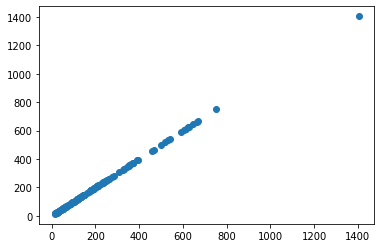

In [ ]:
plt.scatter(predictions,predictions)

In [ ]:
arr=[]

In [ ]:
arr=delhi_housing.columns

In [ ]:
len(arr)

81

In [ ]:
import tensorflow as tf
from tensorflow import keras
keras_file="model_nsorrr12345"
tf.keras.models.save_model(NN_model,keras_file)

converter = tf.lite.TFLiteConverter.from_saved_model(keras_file)
tflite_model = converter.convert()
open("delhihousfinal1.3.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: model_nsorrr12345/assets


INFO:tensorflow:Assets written to: model_nsorrr12345/assets


702268

In [ ]:
#model.save('/content/sample_data')

In [ ]:
#fil='/content/delhihousfinal (2).tflite'
#model1=open(fil,'r')